<a href="https://colab.research.google.com/github/laura314159265/poly/blob/main/SIMULACI%C3%93_A/Din%C3%A0mica_planet%C3%A0ria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

L'equació diferencial que hem de resoldre és de la forma:

$\frac{d^2\vec{r}_{i}}{dt^2}m_{i}=-Gm_{i}\sum{\frac{\vec{r}_{j}-\vec{r}_{i}}{|\vec{r}_{j}-\vec{r}_{i}|^3}m_{j}}$

On "i" és l'índex del cos que rep la força i "j" el dels cossos que fan força sobre ell.

Normalitzant per la Terra, queda:
$
\frac{d^2\vec{\tilde{r}}_{terra}}{d\tilde{t}^2}=-\left[\frac{\vec{\tilde{r}}_{sol}-\vec{\tilde{r}}_{terra}}{|\vec{\tilde{r}}_{sol}-\vec{\tilde{r}}_{terra}|^3}+
\frac{\tilde{m}_{lluna}}{\tilde{m}_{sol}}\frac{\vec{\tilde{r}}_{lluna}-\vec{\tilde{r}}_{terra}}{|\vec{\tilde{r}}_{lluna}-\vec{\tilde{r}}_{terra}|^3}+
\frac{\tilde{m}_{mart}}{\tilde{m}_{sol}}\frac{\vec{\tilde{r}}_{mart}-\vec{\tilde{r}}_{terra}}{|\vec{\tilde{r}}_{mart}-\vec{\tilde{r}}_{terra}|^3}\right]
$

On tenim que ($r_i$ representta cada una de les components x, y o z):
$\tilde{r}_i= \frac{r_i}{r_0},\qquad \tilde{m}_i=\frac{m_i}{m_0}, \qquad \tilde{t}=\frac{t}{t_0}, \qquad r_0=(Gt_{0}^2m_{sol})^{1/3}$

Per la component x, per exemple, queda:
$
\frac{d^2\tilde{x}_{terra}}{d\tilde{t}^2}=-\left[\frac{\tilde{x}_{sol}-\tilde{x}_{terra}}{|\vec{\tilde{r}}_{sol}-\vec{\tilde{r}}_{terra}|^3}+
\frac{\tilde{m}_{lluna}}{\tilde{m}_{sol}}\frac{\tilde{x}_{lluna}-\tilde{x}_{terra}}{|\vec{\tilde{r}}_{lluna}-\vec{\tilde{r}}_{terra}|^3}+
\frac{\tilde{m}_{mart}}{\tilde{m}_{sol}}\frac{\tilde{x}_{mart}-\tilde{x}_{terra}}{|\vec{\tilde{r}}_{mart}-\vec{\tilde{r}}_{terra}|^3}\right]
$


On: $\tilde{x_i}=\frac{x_i}{r_0}$

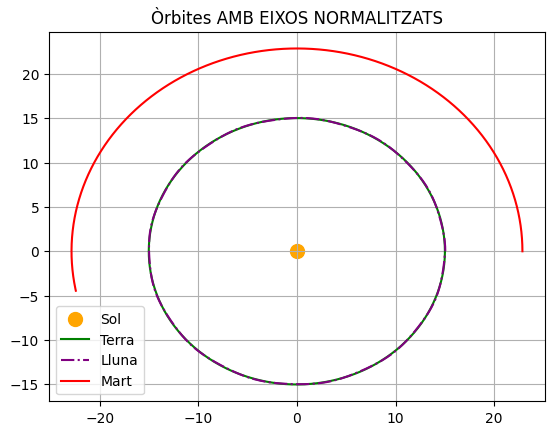

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Dades en unitats si
G= 6.67430e-11
m_sol= 1.98847e30
m_terra= 5.97219e24
m_lluna= 7.342e22
m_mart= 6.4171e23

# Per la normalització
t0= 86400.0            # Temps característic agafem 1 dia
m0= m_sol              # Massa característica agafem la del sol
r0= (G * t0**2 * m0)**(1/3)  # Radi característic

masses= np.array([m_sol, m_terra, m_lluna, m_mart]) / m0

  # CONDICIONS INICIALS
UA= 1.495978707e11 # unitat astronòmica, distància mitjana terra-sol
terra_dist= UA
mart_dist= 1.524 * UA
lluna_dist= 384400e3 # distància promig terra i lluna

v_terra= np.sqrt(G*m_sol/terra_dist)
v_mart= np.sqrt(G*m_sol/mart_dist)
v_lluna= np.sqrt(G*m_terra/lluna_dist)

posicions= np.zeros((4,3))
posicions[1]= np.array([terra_dist, 0, 0])
posicions[2]= posicions[1] + np.array([lluna_dist, 0, 0])
posicions[3]= np.array([mart_dist, 0, 0])
posicions_norm= posicions/r0

# VELOCITATS EN SI
velocitats= np.zeros((4,3))
velocitats[1]= np.array([0, v_terra, 0])
velocitats[2]= velocitats[1] + np.array([0, v_lluna, 0])
velocitats[3]= np.array([0, v_mart, 0])

# Per conservar moment total
p= m_terra*velocitats[1] + m_lluna*velocitats[2] + m_mart*velocitats[3]
velocitats[0]= -p/m_sol

velocitats_norm= velocitats*(t0/r0)

def acceleracions(pos, masses):
    N= len(masses) # Nombre de planetes
    acc= np.zeros_like(pos) # Crea un array amb la mateixa forma que pos però ple de zeros
    for i in range(N):
        for j in range(N):
            if i != j: # Si i ≠ j
              diff= pos[j] - pos[i]
              d= np.linalg.norm(diff)
              acc[i] += masses[j] * diff / d**3
    return acc

def rk4(pos, vel, masses, h): # h és l'interval de temps
    K1= vel
    L1= acceleracions(pos, masses)
    pos2= pos + 0.5*h*K1
    vel2= vel + 0.5*h*L1
    K2= vel2
    L2= acceleracions(pos2, masses)
    pos3= pos + 0.5*h*K2
    vel3= vel + 0.5*h*L2
    K3= vel3
    L3= acceleracions(pos3, masses)
    pos4= pos + h*K3
    vel4= vel + h*L3
    K4= vel4
    L4= acceleracions(pos4, masses)

    pos_nova= pos + (h/6)*(K1 + 2*K2 + 2*K3 + K4)
    vel_nova= vel + (h/6)*(L1 + 2*L2 + 2*L3 + L4)
    return pos_nova, vel_nova

dies= 365
h_dies= 0.5
passos= int(dies/h_dies)
h=h_dies

traj= np.zeros((passos+1,4,3))
traj[0]= posicions_norm

pos = posicions_norm.copy()
vel = velocitats_norm.copy()

for k in range(1, passos+1):
    pos, vel = rk4(pos, vel, masses, h)
    traj[k] = pos

# PLOTEGEM
# plt.plot(traj[:,0,0], traj[:,0,1], label="Sol") # No es veu res perquè es mou molt poc
plt.scatter(traj[0,0,0], traj[0,0,1], label="Sol", color="orange", s=100) # Posició inicial sol
plt.plot(traj[:,1,0], traj[:,1,1], label="Terra", color= "green")
plt.plot(traj[:,2,0], traj[:,2,1], label="Lluna", color="purple", linestyle="-.")
plt.plot(traj[:,3,0], traj[:,3,1], label="Mart", color="red")

plt.grid(True)
plt.legend()
plt.title("Òrbites AMB EIXOS NORMALITZATS")
plt.show()

